# Breast Cancer Wisconsin : Predict whether the cancer is benign or malignant

In [83]:
#Step 1 : Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# Step 2: Load dataset
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# Step 3: Initial Exploration :
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Step 4 : Data Preprocessing
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

# Since the 'Unnamed' column has no values, we need to drop it. Additionally, we should ensure there is a unique identifier in the dataset.

In [6]:
# 1.Drop unuseful coloumns  from dataset
df.drop(columns=['Unnamed: 32', 'id'],inplace=True)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
# Convert target column 'diagnosis' to binary (M=1, B=0)
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

In [8]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
#Checking the dataset is Imbalanced 
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

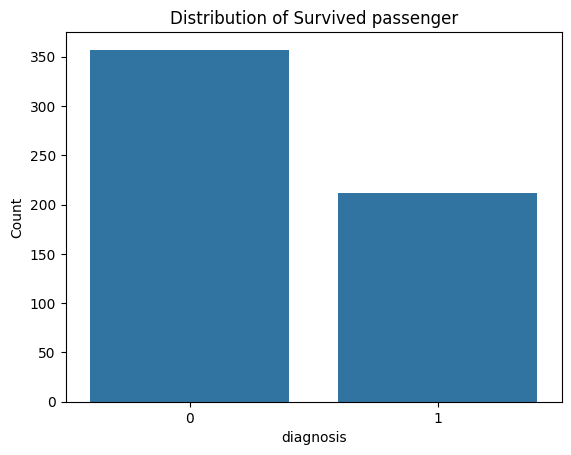

In [10]:
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Survived passenger')
plt.xlabel('diagnosis')
plt.ylabel('Count')

plt.show()

# Imbalanced Dataset

In [12]:
# Features and target
X = df.drop("diagnosis", axis=1)
Y = df["diagnosis"]

In [14]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X,Y)

In [15]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,...,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,...,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,...,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,...,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,...,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,18.686907,20.146669,121.560066,1070.972186,0.097147,0.127576,0.148245,0.088442,0.187695,0.063002,...,23.422457,25.677570,148.814901,1608.545034,0.135144,0.313247,0.435852,0.177186,0.304722,0.093867
710,15.178552,30.246969,100.319040,718.097384,0.094853,0.133794,0.159145,0.063480,0.200089,0.062963,...,17.400262,40.082071,120.134101,922.552728,0.129312,0.472533,0.702422,0.157379,0.369478,0.104403
711,18.138989,19.691574,118.172472,1014.653567,0.095350,0.109113,0.102217,0.074226,0.181927,0.057692,...,21.187086,25.852310,138.612149,1377.400966,0.136653,0.313439,0.341134,0.178637,0.312798,0.077744
712,17.937832,20.679072,117.463430,987.599453,0.104066,0.129009,0.121822,0.088863,0.197713,0.060691,...,21.074951,25.844176,138.386085,1349.729236,0.148015,0.364065,0.333572,0.196575,0.303549,0.084523


In [16]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
709    1
710    1
711    1
712    1
713    1
Name: diagnosis, Length: 714, dtype: int64

In [17]:
df1_ = pd.DataFrame(X,columns = X.columns)
df2_ = pd.DataFrame(Y, columns = ['diagnosis'])

In [18]:
df1_

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,...,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,...,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,...,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,...,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,...,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,18.686907,20.146669,121.560066,1070.972186,0.097147,0.127576,0.148245,0.088442,0.187695,0.063002,...,23.422457,25.677570,148.814901,1608.545034,0.135144,0.313247,0.435852,0.177186,0.304722,0.093867
710,15.178552,30.246969,100.319040,718.097384,0.094853,0.133794,0.159145,0.063480,0.200089,0.062963,...,17.400262,40.082071,120.134101,922.552728,0.129312,0.472533,0.702422,0.157379,0.369478,0.104403
711,18.138989,19.691574,118.172472,1014.653567,0.095350,0.109113,0.102217,0.074226,0.181927,0.057692,...,21.187086,25.852310,138.612149,1377.400966,0.136653,0.313439,0.341134,0.178637,0.312798,0.077744
712,17.937832,20.679072,117.463430,987.599453,0.104066,0.129009,0.121822,0.088863,0.197713,0.060691,...,21.074951,25.844176,138.386085,1349.729236,0.148015,0.364065,0.333572,0.196575,0.303549,0.084523


In [19]:
df2_

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
709,1
710,1
711,1
712,1


In [20]:
after_smote_df = pd.concat([df1_, df2_], axis=1)

In [21]:
print("INITIAL DATA SHAPE : ", df.shape)
print("AFTER SMOTE SHAPE : ", after_smote_df.shape)
# Now the data is balanced..we are keeping the original data as we will se the model performace with raw data as well.

INITIAL DATA SHAPE :  (569, 31)
AFTER SMOTE SHAPE :  (714, 31)


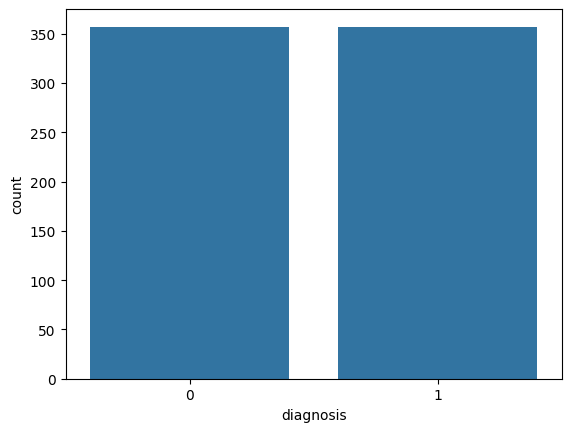

In [22]:
sns.countplot(x= 'diagnosis',data = after_smote_df)
plt.show()

In [23]:
new_samples = pd.DataFrame(X[len(df):])
print("Newly generated samples: \n", new_samples)

Newly generated samples: 
      radius_mean  texture_mean  perimeter_mean    area_mean  smoothness_mean  \
569    22.857068     20.217415      150.301718  1648.448164         0.093524   
570    15.137666     29.431821       96.822943   719.045163         0.083577   
571    13.915993     17.892764       91.490376   583.721598         0.103362   
572    15.101626     21.585744       97.383608   713.109021         0.090414   
573    13.576086     21.872791       88.015101   573.680702         0.097447   
..           ...           ...             ...          ...              ...   
709    18.686907     20.146669      121.560066  1070.972186         0.097147   
710    15.178552     30.246969      100.319040   718.097384         0.094853   
711    18.138989     19.691574      118.172472  1014.653567         0.095350   
712    17.937832     20.679072      117.463430   987.599453         0.104066   
713    20.599411     29.230291      140.072924  1265.506198         0.117645   

     compact

In [26]:
# Creating a copy of smote_df
fdf = after_smote_df

In [27]:
fdf.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [32]:
for i, col in enumerate(fdf.columns):
    print(i, col)

0 radius_mean
1 texture_mean
2 perimeter_mean
3 area_mean
4 smoothness_mean
5 compactness_mean
6 concavity_mean
7 concave points_mean
8 symmetry_mean
9 fractal_dimension_mean
10 radius_se
11 texture_se
12 perimeter_se
13 area_se
14 smoothness_se
15 compactness_se
16 concavity_se
17 concave points_se
18 symmetry_se
19 fractal_dimension_se
20 radius_worst
21 texture_worst
22 perimeter_worst
23 area_worst
24 smoothness_worst
25 compactness_worst
26 concavity_worst
27 concave points_worst
28 symmetry_worst
29 fractal_dimension_worst
30 diagnosis


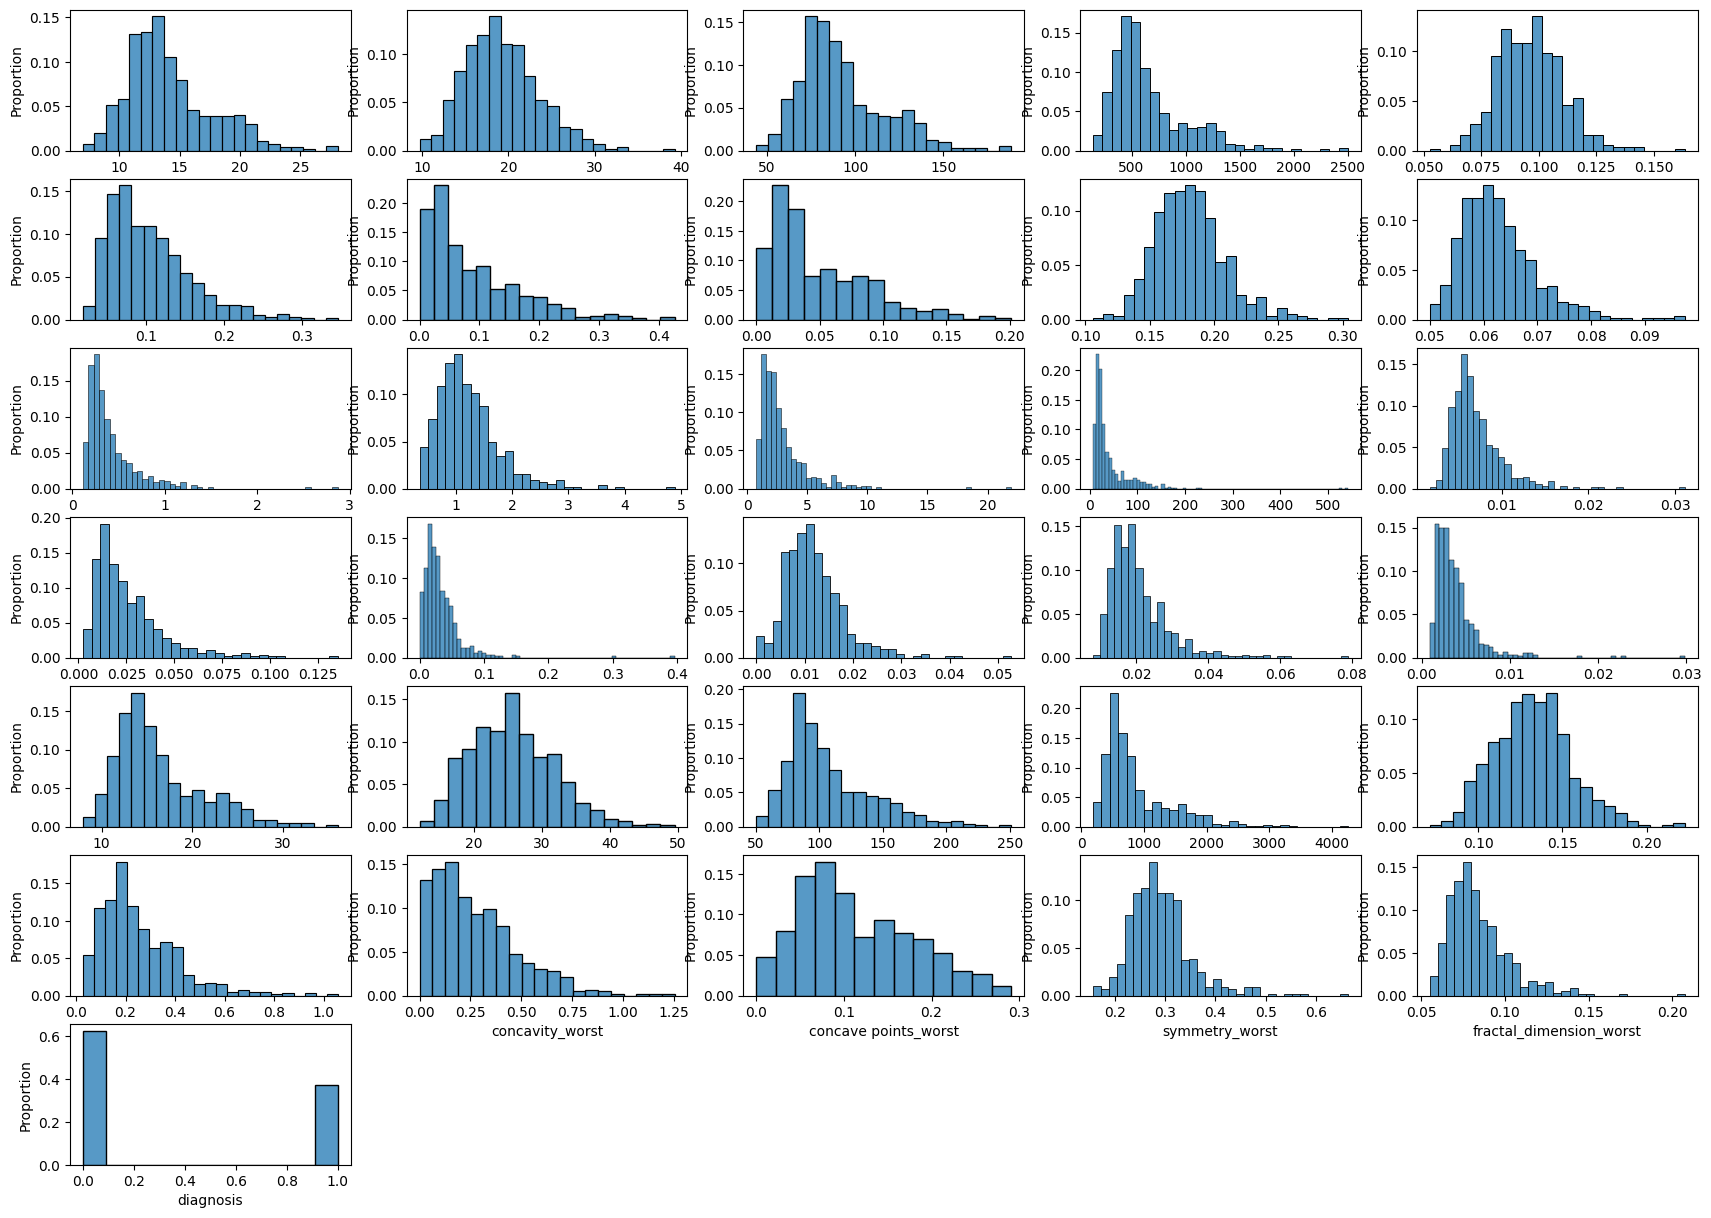

In [36]:
plt.figure(figsize=(21,15))

plt.subplot2grid((7,5), (0,0))
sns.histplot(df.radius_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (0,1))
sns.histplot(df.texture_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (0,2))
sns.histplot(df.perimeter_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (0,3))
sns.histplot(df.area_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (0,4))
sns.histplot(df.smoothness_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (1,0))
sns.histplot(df.compactness_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (1,1))
sns.histplot(df.concavity_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (1,2))
sns.histplot(df['concave points_mean'].sort_values(), stat='proportion')

plt.subplot2grid((7,5), (1,3))
sns.histplot(df.symmetry_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (1,4))
sns.histplot(df.fractal_dimension_mean.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (2,0))
sns.histplot(df.radius_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (2,1))
sns.histplot(df.texture_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (2,2))
sns.histplot(df.perimeter_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (2,3))
sns.histplot(df.area_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (2,4))
sns.histplot(df.smoothness_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (3,0))
sns.histplot(df.compactness_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (3,1))
sns.histplot(df.concavity_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (3,2))
sns.histplot(df['concave points_se'].sort_values(), stat='proportion')

plt.subplot2grid((7,5), (3,3))
sns.histplot(df.symmetry_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (3,4))
sns.histplot(df.fractal_dimension_se.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (4,0))
sns.histplot(df.radius_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (4,1))
sns.histplot(df.texture_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (4,2))
sns.histplot(df.perimeter_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (4,3))
sns.histplot(df.area_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (4,4))
sns.histplot(df.smoothness_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (5,0))
sns.histplot(df.compactness_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (5,1))
sns.histplot(df.concavity_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (5,2))
sns.histplot(df['concave points_worst'].sort_values(), stat='proportion')

plt.subplot2grid((7,5), (5,3))
sns.histplot(df.symmetry_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (5,4))
sns.histplot(df.fractal_dimension_worst.sort_values(), stat='proportion')

plt.subplot2grid((7,5), (6,0))
sns.histplot(df.diagnosis.sort_values(), stat='proportion')

plt.show()

In [45]:
# first viaulize the outliers
def show_boxplots(df:pd.DataFrame):
    fig, axs = plt.subplots(10, 3, figsize = (15, 12))
    
    for i, column in enumerate(df.columns[:-1]):
        row_index = i // 3
        col_index = i % 3
        sns.boxplot(y=column, data=df, ax=axs[row_index, col_index])
        axs[row_index, col_index].set_title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()

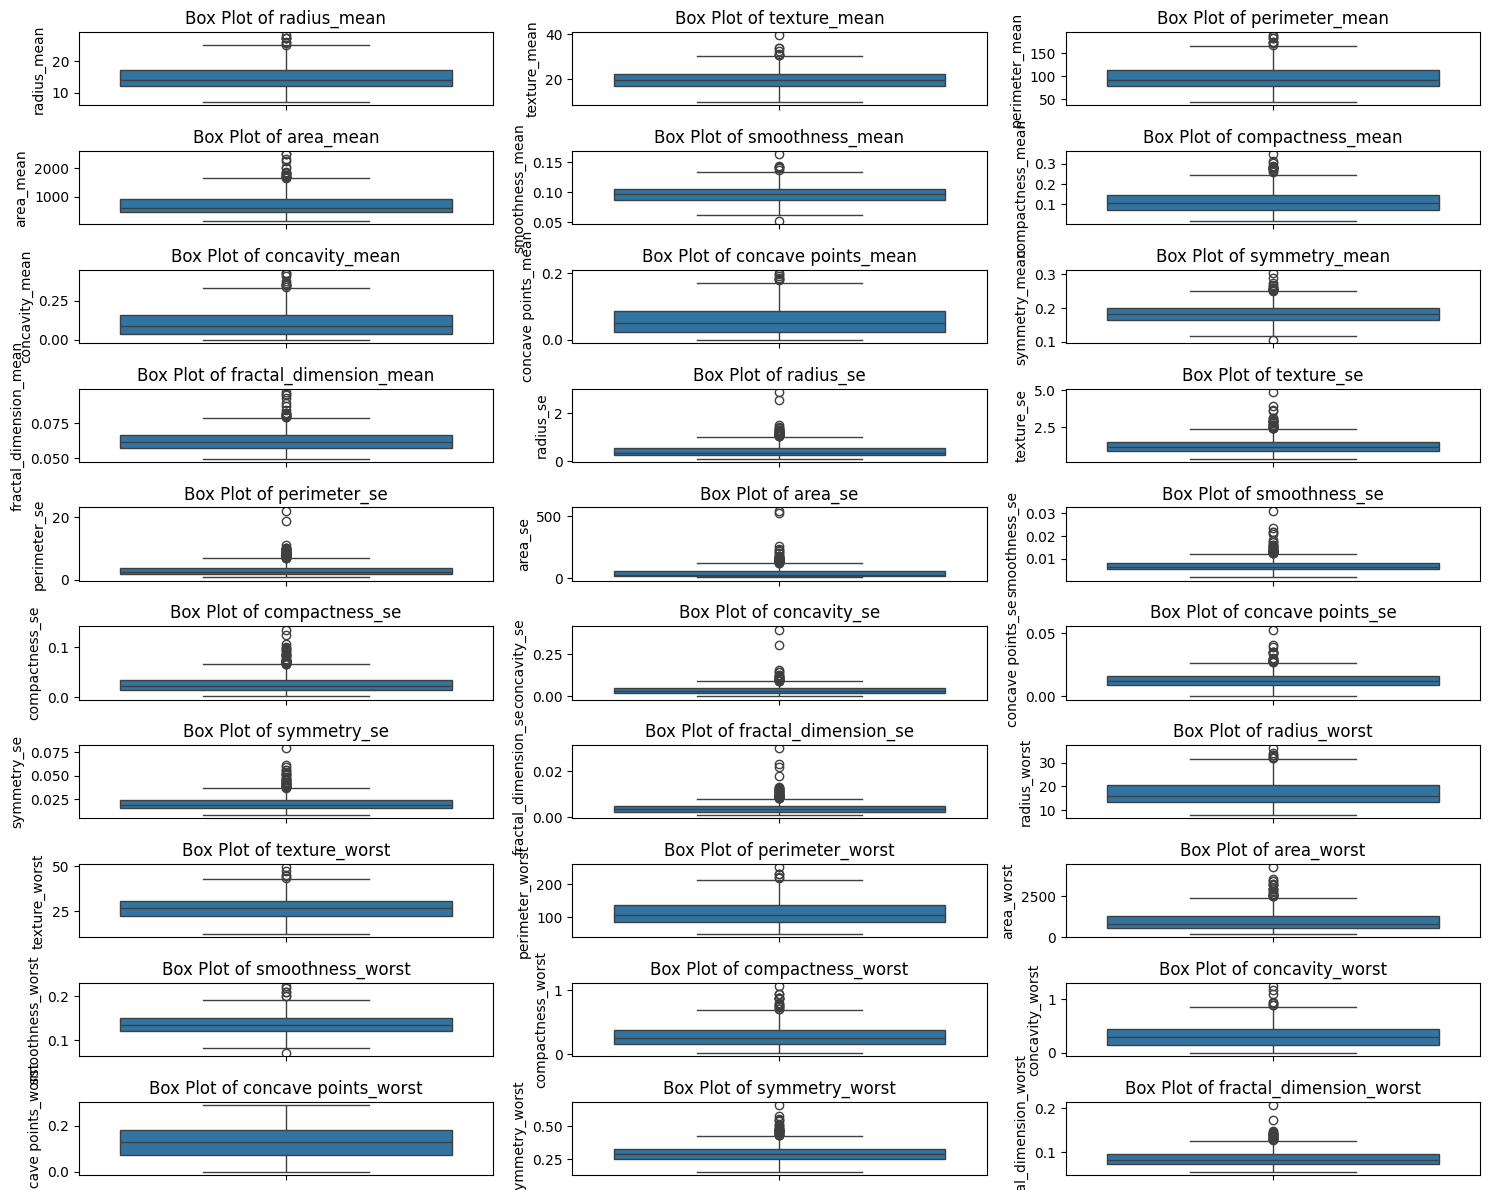

In [46]:
show_boxplots(fdf)

In [47]:
def get_iqr_thresholds(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_fence = q1 - 1.5 * IQR
    upper_fence = q3 + 1.5 * IQR
    return lower_fence, upper_fence

In [48]:
def get_outliers_count(df: pd.DataFrame):
#     desc_df = fdf.describe()
    outliers_count = {}

    for column in df.columns[:-1]:
        lower_fence, upper_fence = get_iqr_thresholds(df,column)

        # Count outliers in the column
        outlier_count = df[(df[column] < lower_fence) | (df[column] > upper_fence)][column].count()

        outliers_count[column] = outlier_count
         
        
    return outliers_count

In [49]:
outliers = get_outliers_count(fdf)
outliers
# You can verify these in the plot as well

{'radius_mean': 7,
 'texture_mean': 8,
 'perimeter_mean': 8,
 'area_mean': 18,
 'smoothness_mean': 7,
 'compactness_mean': 14,
 'concavity_mean': 11,
 'concave points_mean': 7,
 'symmetry_mean': 17,
 'fractal_dimension_mean': 16,
 'radius_se': 31,
 'texture_se': 26,
 'perimeter_se': 45,
 'area_se': 35,
 'smoothness_se': 34,
 'compactness_se': 31,
 'concavity_se': 22,
 'concave points_se': 20,
 'symmetry_se': 33,
 'fractal_dimension_se': 36,
 'radius_worst': 7,
 'texture_worst': 5,
 'perimeter_worst': 5,
 'area_worst': 20,
 'smoothness_worst': 7,
 'compactness_worst': 16,
 'concavity_worst': 8,
 'concave points_worst': 0,
 'symmetry_worst': 29,
 'fractal_dimension_worst': 21}

In [50]:
fdf.shape

(714, 31)

In [51]:
# Replacing with median as outliers are in numerical features
def impute_outliers_with_median(df: pd.DataFrame, outliers_count_dict: dict):
    for column, outlier_count in outliers_count_dict.items():
        if outlier_count > 2:
            lower_fence, upper_fence = get_iqr_thresholds(df,column)
            # Impute outliers with median
            median_value = df[column].median()
            
            # Replace outliers in the entire DataFrame with median for the specified column
            df[column] = np.where((df[column] < lower_fence) | (df[column] > upper_fence), median_value, df[column])

    return df

In [52]:
fdf = impute_outliers_with_median(fdf, outliers)

In [53]:
get_outliers_count(fdf)

{'radius_mean': 1,
 'texture_mean': 2,
 'perimeter_mean': 3,
 'area_mean': 1,
 'smoothness_mean': 2,
 'compactness_mean': 4,
 'concavity_mean': 1,
 'concave points_mean': 0,
 'symmetry_mean': 5,
 'fractal_dimension_mean': 2,
 'radius_se': 20,
 'texture_se': 9,
 'perimeter_se': 22,
 'area_se': 53,
 'smoothness_se': 10,
 'compactness_se': 10,
 'concavity_se': 4,
 'concave points_se': 6,
 'symmetry_se': 16,
 'fractal_dimension_se': 12,
 'radius_worst': 1,
 'texture_worst': 0,
 'perimeter_worst': 4,
 'area_worst': 6,
 'smoothness_worst': 2,
 'compactness_worst': 3,
 'concavity_worst': 0,
 'concave points_worst': 0,
 'symmetry_worst': 7,
 'fractal_dimension_worst': 12}

In [54]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [55]:
# For printing the outliers
outl = find_outliers_IQR(fdf["area_se"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 53
max outlier value: 120.0
min outlier value: 94.73491506763025


12     116.200000
18     112.400000
24     102.600000
25     111.400000
30     105.000000
38     106.000000
42     104.900000
53      98.810000
56     102.500000
70      96.050000
78     116.400000
82     120.000000
138    101.900000
161    119.300000
162     97.070000
164     97.850000
210    111.700000
219    109.900000
256    106.400000
366    103.600000
433    103.900000
460    115.200000
468    104.900000
498     95.770000
533    100.400000
563    118.800000
565     99.040000
576    104.421096
586     95.354765
588    109.001251
599    103.408874
609    102.651703
618    100.918897
620     99.687063
628    105.079312
630    119.001920
632    104.325845
633    112.481743
634    101.870888
648    116.904706
654    102.377210
665    104.919175
669     97.623296
672     94.734915
673    108.056568
674    106.935973
676    104.159676
681    112.288143
686    101.730655
689     98.763822
697    107.975574
704    119.687264
708     98.972021
Name: area_se, dtype: float64

In [58]:
fdf = fdf.drop(outl.index)

In [59]:
# For printing the outliers
outl = find_outliers_IQR(fdf["perimeter_se"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 7
max outlier value: 5.353
min outlier value: 5.144


127    5.216000
237    5.144000
343    5.173000
492    5.353000
595    5.193893
600    5.230850
647    5.304589
Name: perimeter_se, dtype: float64

In [60]:
fdf = fdf.drop(outl.index)

In [61]:
# For printing the outliers
outl = find_outliers_IQR(fdf["radius_se"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 10
max outlier value: 1.008
min outlier value: 0.7311


2      0.7456
75     0.7474
95     0.7576
152    0.8245
191    0.7311
252    0.7661
290    0.8811
352    0.9948
369    1.0080
521    0.9915
Name: radius_se, dtype: float64

In [62]:
fdf = fdf.drop(outl.index)

In [63]:
# For printing the outliers
outl = find_outliers_IQR(fdf["symmetry_se"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 18
max outlier value: 0.03677482136200398
min outlier value: 0.03265


22     0.036720
61     0.033570
110    0.032810
147    0.033560
160    0.033970
174    0.032650
245    0.034760
266    0.035040
288    0.034180
289    0.034160
299    0.034640
318    0.034910
319    0.034330
345    0.036750
574    0.036463
631    0.035363
635    0.036775
644    0.033218
Name: symmetry_se, dtype: float64

In [64]:
fdf = fdf.drop(outl.index)

In [65]:
# For printing the outliers
outl = find_outliers_IQR(fdf["fractal_dimension_worst"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 8
max outlier value: 0.1252
min outlier value: 0.12211470757095992


5      0.124400
34     0.123300
118    0.125200
229    0.124300
465    0.124900
504    0.125200
655    0.122115
687    0.124601
Name: fractal_dimension_worst, dtype: float64

In [66]:
fdf = fdf.drop(outl.index)

In [67]:
fdf.skew()

radius_mean                0.710582
texture_mean               0.310611
perimeter_mean             0.736640
area_mean                  1.088756
smoothness_mean            0.146723
compactness_mean           0.718496
concavity_mean             0.988679
concave points_mean        0.885132
symmetry_mean              0.277387
fractal_dimension_mean     0.609830
radius_se                  0.707815
texture_se                 0.624384
perimeter_se               0.597348
area_se                    1.296579
smoothness_se              0.654404
compactness_se             0.950528
concavity_se               0.800829
concave points_se          0.317249
symmetry_se                0.627446
fractal_dimension_se       0.863752
radius_worst               0.894634
texture_worst              0.217458
perimeter_worst            0.946822
area_worst                 1.222704
smoothness_worst           0.062969
compactness_worst          0.739343
concavity_worst            0.603230
concave points_worst       0

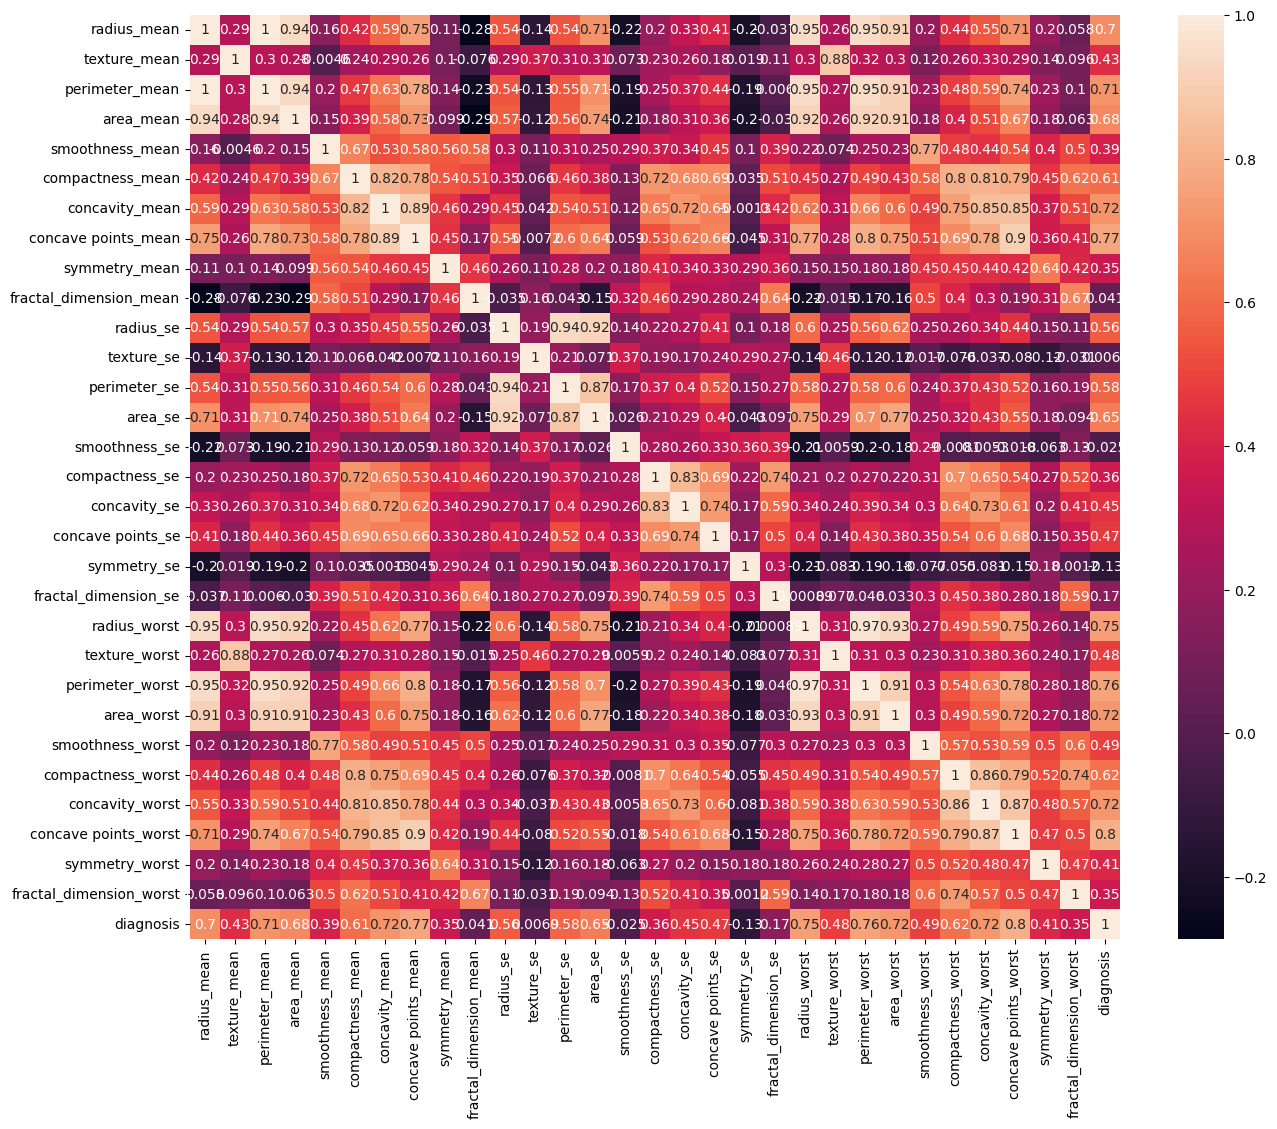

In [68]:
plt.figure(figsize=(15, 12))
sns.heatmap(fdf.corr(method='pearson'),annot=True)
plt.show()

In [69]:
fdf

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.107050,0.300100,0.147100,0.241900,0.078710,...,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.288650,0.118900,1
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,...,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,1
3,11.420000,20.380000,77.580000,386.100000,0.097515,0.107050,0.241400,0.105200,0.182100,0.061790,...,26.500000,98.870000,567.700000,0.135172,0.246796,0.686900,0.257500,0.288650,0.081431,1
6,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,...,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680,1
7,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,...,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,15.096549,22.661896,97.387689,713.455700,0.092603,0.075448,0.064776,0.038894,0.162135,0.058186,...,31.954006,118.303934,1033.451053,0.143576,0.210859,0.293925,0.152931,0.267138,0.081430,1
709,18.686907,20.146669,121.560066,1070.972186,0.097147,0.127576,0.148245,0.088442,0.187695,0.063002,...,25.677570,148.814901,1608.545034,0.135144,0.313247,0.435852,0.177186,0.304722,0.093867,1
710,15.178552,30.246969,100.319040,718.097384,0.094853,0.133794,0.159145,0.063480,0.200089,0.062963,...,40.082071,120.134101,922.552728,0.129312,0.472533,0.702422,0.157379,0.369478,0.104403,1
711,18.138989,19.691574,118.172472,1014.653567,0.095350,0.109113,0.102217,0.074226,0.181927,0.057692,...,25.852310,138.612149,1377.400966,0.136653,0.313439,0.341134,0.178637,0.312798,0.077744,1


In [70]:
# Features and target
X = fdf.drop("diagnosis", axis=1)
Y = fdf["diagnosis"]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [71]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
X_train

array([[ 0.4400232 ,  0.95285209,  0.78988396, ...,  1.98519296,
         0.87399721,  1.40257327],
       [-0.32754414,  0.2999328 , -0.38091539, ..., -1.18498937,
        -0.35299555, -0.57529686],
       [ 1.80258559,  1.16737402,  1.8840017 , ...,  1.17421237,
         0.90590533,  0.79127382],
       ...,
       [-0.47798734, -0.49535235, -0.50677408, ..., -0.96660765,
        -0.3509159 , -0.96284765],
       [-1.39722598, -1.5164592 , -1.27401942, ..., -0.16758201,
        -0.0181721 , -0.06376859],
       [ 1.70804444,  1.42413217,  1.69463327, ...,  0.8521535 ,
         0.93222737,  0.16685217]])

In [73]:
X_test

array([[ 0.86679064, -0.05843643,  0.93321059, ...,  2.11091378,
         0.52461622,  0.59380276],
       [-0.41044141, -1.52136837, -0.47810876, ..., -1.00323742,
        -1.13910278, -0.94350593],
       [-1.0030034 , -0.41680567, -0.97527299, ..., -0.30556449,
        -1.18069575,  0.03289284],
       ...,
       [-0.07203514, -0.32438717, -0.0417856 , ...,  0.38299245,
         0.92155442,  0.03393787],
       [-1.47091245, -0.2449848 , -1.46661457, ..., -1.05197364,
        -0.83755371, -0.06883029],
       [ 2.46947124,  0.08638401,  2.69791964, ...,  2.68053773,
         2.49196393,  1.11531288]])

In [81]:
# Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, Y_train)
# Predictions and probabilities
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]
# Evaluation metrics
conf_matrix = confusion_matrix(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_prob)

conf_matrix, precision, recall, roc_auc


(array([[63,  0],
        [ 2, 54]], dtype=int64),
 1.0,
 0.9642857142857143,
 0.9985827664399093)

Confusion Matrix : (63 True Negatives, 54 True Positives, 0 False Positive, 2 False Negatives)

Precision: 1.0 (100%)

Recall: 0.96428 (96.42%)

ROC-AUC: 0.9985 (excellent performance)

In [84]:
# Tune threshold
threshold = 0.4
y_pred_adj = (y_prob >= threshold).astype(int)
conf_matrix_adj = confusion_matrix(Y_test, y_pred_adj)
precision_adj = precision_score(Y_test, y_pred_adj)
recall_adj = recall_score(Y_test, y_pred_adj)

# ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

(conf_matrix, precision, recall, roc_auc,
 conf_matrix_adj, precision_adj, recall_adj,
 fpr, tpr)

(array([[63,  0],
        [ 2, 54]], dtype=int64),
 1.0,
 0.9642857142857143,
 0.9985827664399093,
 array([[62,  1],
        [ 2, 54]], dtype=int64),
 0.9818181818181818,
 0.9642857142857143,
 array([0.        , 0.        , 0.        , 0.03174603, 0.03174603,
        0.04761905, 0.04761905, 1.        ]),
 array([0.        , 0.01785714, 0.96428571, 0.96428571, 0.98214286,
        0.98214286, 1.        , 1.        ]))

In [87]:
new_data = pd.DataFrame([{
    'mean_radius': 15.0,
    'mean_texture': 18.0,
    'mean_perimeter': 100.0,
    'mean_area': 700.0,
    'mean_smoothness': 0.10,
    'mean_compactness': 0.15,
    'mean_concavity': 0.05,
    'mean_concave_points': 0.02,
    'mean_symmetry': 0.20,
    'mean_fractal_dimension': 0.06,
    'radius_error': 0.50,
    'texture_error': 1.00,
    'perimeter_error': 3.50,
    'area_error': 40.0,
    'smoothness_error': 0.005,
    'compactness_error': 0.02,
    'concavity_error': 0.01,
    'concave_points_error': 0.005,
    'symmetry_error': 0.02,
    'fractal_dimension_error': 0.003,
    'worst_radius': 17.0,
    'worst_texture': 20.0,
    'worst_perimeter': 120.0,
    'worst_area': 900.0,
    'worst_smoothness': 0.12,
    'worst_compactness': 0.25,
    'worst_concavity': 0.10,
    'worst_concave_points': 0.05,
    'worst_symmetry': 0.30,
    'worst_fractal_dimension': 0.08
}])
prediction = lr.predict(new_data)
#(M=1, B=0)
print("\nPrediction for new passenger:", "Malignant(M)" if prediction[0] == 1 else "Benign(B)")


Prediction for new passenger: Malignant(M)


C:\Users\Thaibathul Munavara\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
